# Increase in Grover's Algorithm complexity due to Isotropic Error

In [1]:
from isotropic.algos.grover import (
    get_grover_circuit,
)
from isotropic.utils.state_transforms import generate_and_add_isotropic_error
from qiskit.quantum_info import Operator, Statevector

## Oracle

We first implement the oracle that will add a phase to our desired search item. 

**Note the negative sign on one of the diagonal entries.**

In [2]:
U_w = Operator(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
    ]
)

In [3]:
num_qubits = 3

## Grover's Circuit

We can now build the circuit and visualise it

In [4]:
grover_circuit = get_grover_circuit(num_qubits=num_qubits, U_w=U_w, iterations=1)

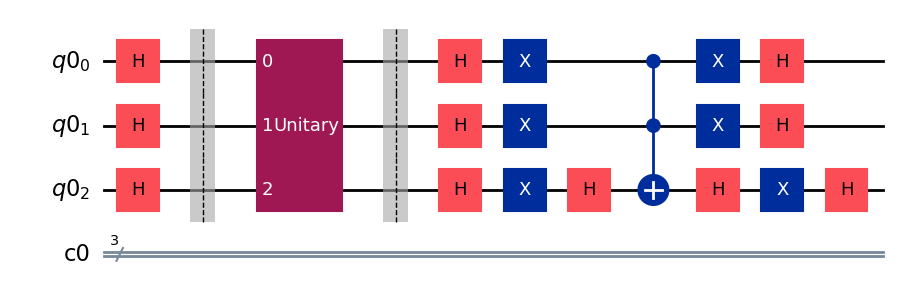

In [5]:
grover_circuit.draw("mpl")

## Compare effect of different values of sigma

Instead of executing the circuit, we check to see the final statevector before measurements.

In [6]:
statevector = Statevector(grover_circuit)

The probability of measuring the $011$ state gives us a likelihood of success for our search exercise.

In [7]:
print(
    f"Search success probability = {(statevector.probabilities_dict()['011']) * 100: 4f} %"
)

Search success probability =  78.125000 %


## Perturbation with isotropic error

Let us now look at the effect of adding an isotropic error

In [8]:
statevector_error = Statevector(
    generate_and_add_isotropic_error(statevector.data, sigma=0.9).tolist()
)

In [9]:
print(
    f"Search success probability = {(statevector_error.probabilities_dict()['011']) * 100: 4f} %"
)

Search success probability =  70.016556 %


We see that this has dropped to $70\%$ from $78\%$.

## Increased iterations

Now let's check the final probability (after isotropic error) when we run the algorithm with 2 iterations of the oracle + diffusion operator instead of 1.

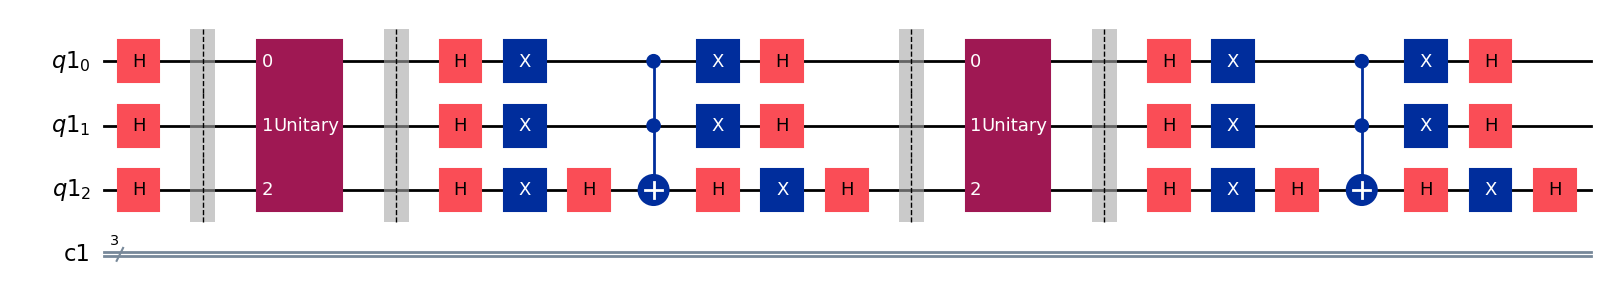

In [10]:
grover_circuit = get_grover_circuit(num_qubits=num_qubits, U_w=U_w, iterations=2)
grover_circuit.draw("mpl")

In [11]:
statevector = Statevector(grover_circuit)

In [12]:
statevector_error = Statevector(
    generate_and_add_isotropic_error(statevector.data, sigma=0.9).tolist()
)

In [13]:
print(
    f"Search success probability = {(statevector_error.probabilities_dict()['011']) * 100: 4f} %"
)

Search success probability =  76.079851 %


While we are not able to recover the original $78\%$ probability, we are able to bump it up to $76\%$ now at the cost of increased algorithmic complexity.